In [1]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = ig.Graph.Read('../../data/graphs/april2022.graphml')

In [3]:
station = "MILANO CENTRALE"

In [4]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1500, 1500) 
}

## Network centric

In [5]:
#to undirected
g.to_undirected()
partition_louvain = g.community_multilevel()
partition_eigen = g.community_leading_eigenvector()

In [6]:
#return true if a graph has a node
def has_node(graph, name):
    try:
        graph.vs.find(label=name)
    except:
        return False
    return True

In [7]:
#extract community with MILANO CENTRALE
for i in range(len(partition_louvain)):
    if has_node(partition_louvain.subgraph(i), station):
        sub_louvain = partition_louvain.subgraph(i)
for i in range(len(partition_eigen)):
    if has_node(partition_eigen.subgraph(i), station):
        sub_eigen = partition_eigen.subgraph(i)

In [ ]:
#ig.plot(sub_louvain,**VISUAL_STYLE)


In [ ]:
#ig.plot(sub_eigen,**VISUAL_STYLE)

In [8]:
#extract name of vertex
eigen_v = []
louvain_v = []
for i in range(len(sub_eigen.vs)):
    eigen_v.append(sub_eigen.vs[i]['label'])

for i in range(len(sub_louvain.vs)):
    louvain_v.append(sub_louvain.vs[i]['label'])


In [ ]:
#find intersection and trim the graphs
#intersection = list(set(eigen_v).intersection(louvain_v))
#trim_eigen_v = [v for v in eigen_v if v not in intersection]
#trim_louvain_v = [v for v in louvain_v if v not in intersection]
#intersection

In [ ]:
#for i in range(len(sub_eigen.vs)):
#    if sub_eigen.vs[i]['label'] in intersection:
#        sub_eigen.vs[i]['color'] = 'red'
#    else:
#        sub_eigen.vs[i]['color'] = 'blue'

#for i in range(len(sub_louvain.vs)):
#    if sub_louvain.vs[i]['label'] in intersection:
#        sub_louvain.vs[i]['color'] = 'red'
#    else:
#        sub_louvain.vs[i]['color'] = 'blue'

In [ ]:
#ig.plot(sub_louvain, **VISUAL_STYLE)

In [ ]:
#ig.plot(sub_eigen, **VISUAL_STYLE)

## Divisive Hierarchical Approaches

In [9]:
dendrogram = g.community_edge_betweenness(clusters=None)
#ig.plot(dendrogram)
dendrogram.summary()

'Dendrogram, 428 elements, 427 merges'

In [10]:
#clustering wirth edge betw
partition_edge_betw = dendrogram.as_clustering()
print(partition_edge_betw)

Clustering with 428 elements and 14 clusters
[ 0] 1863, 3123, 3380, 737, 457, 2228, 407, 1037, 193, 2981, 746, 1039, 2611,
     2889, 588, 964, 736, 3134, 199, 1585, 615, 2790, 2973, 1682, 1311, 1596,
     332, 2518, 2301, 2143, 2046, 2640, 2138
[ 1] 5072, 5071, 2033, 1711, 819, 5073, 1713, 5409, 1581, 1707, 858, 1841,
     5052, 1715, 899, 2987, 5046, 2696, 5070, 1712, 3099, 5069, 5066, 5053,
     766, 1708, 3098, 1554, 1230, 1728, 905, 1998, 2716, 5065, 453, 5054
[ 2] 1949, 1739, 2487, 1188, 2435, 2564, 1720, 2520, 2651, 1583, 2111, 1040,
     710, 2211, 2686, 937, 2820, 1749, 1969, 374, 3092, 1093, 1688, 975, 2481,
     2164, 1134, 2589, 1069, 1584, 1626, 1528, 2604
[ 3] 654, 2260, 2636, 1046, 1413, 636, 2906, 635, 1393, 1087, 85053, 2250,
     801, 2994, 1492, 1542, 451, 85033, 1593, 2974, 405, 2833, 85099, 1029,
     1853
[ 4] 3015, 2930, 811, 1066, 2836, 1550, 3101, 2223, 2982, 634, 1119, 642, 891,
     2337, 388, 947, 1761, 424, 1930, 2612, 2235, 950, 1964, 768, 807, 1193,
     

In [ ]:
#skip
#partition_edge_betw.modularity
#partition_edge_betw.summary()
#g.vs['label'] = partition_edge_betw.membership
#ig.plot(partition_edge_betw)

#dendrogram_cut_2 = g.community_edge_betweenness(clusters=3)
#print(dendrogram_cut_2.as_clustering())

#partition_edge_betw_cut_2 = dendrogram_cut_2.as_clustering()

#g.vs['label'] = partition_edge_betw_cut_2.membership
#ig.plot(partition_edge_betw_cut_2)

In [11]:
#find subgraph with MILANO CENTRALE
for i in range(len(partition_edge_betw)):
    if has_node(partition_edge_betw.subgraph(i), station):
        sub_betw = partition_edge_betw.subgraph(i)

In [12]:
#extract names of vertex
edge_betw_v = []
for i in range(len(sub_betw.vs)):
    edge_betw_v.append(sub_betw.vs[i]['label'])

In [ ]:
#ig.plot(sub_betw)

In [13]:
#find intersection and trim the graphs
all_inter = [v for v in eigen_v if v in louvain_v and v in edge_betw_v]
eigen_louv_inter = [v for v in eigen_v if v in louvain_v and v not in edge_betw_v]
eigen_edge_inter = [v for v in eigen_v if v not in louvain_v and v in edge_betw_v]
louv_edge_inter = [v for v in louvain_v if v in edge_betw_v and v not in eigen_v]
eigen_trim = [v for v in eigen_v if v not in louvain_v and v not in edge_betw_v]
louvain_trim = [v for v in louvain_v if v not in eigen_v and v not in edge_betw_v]
edge_trim = [v for v in edge_betw_v if v not in eigen_v and v not in louvain_v]

<function matplotlib.pyplot.show(close=None, block=None)>

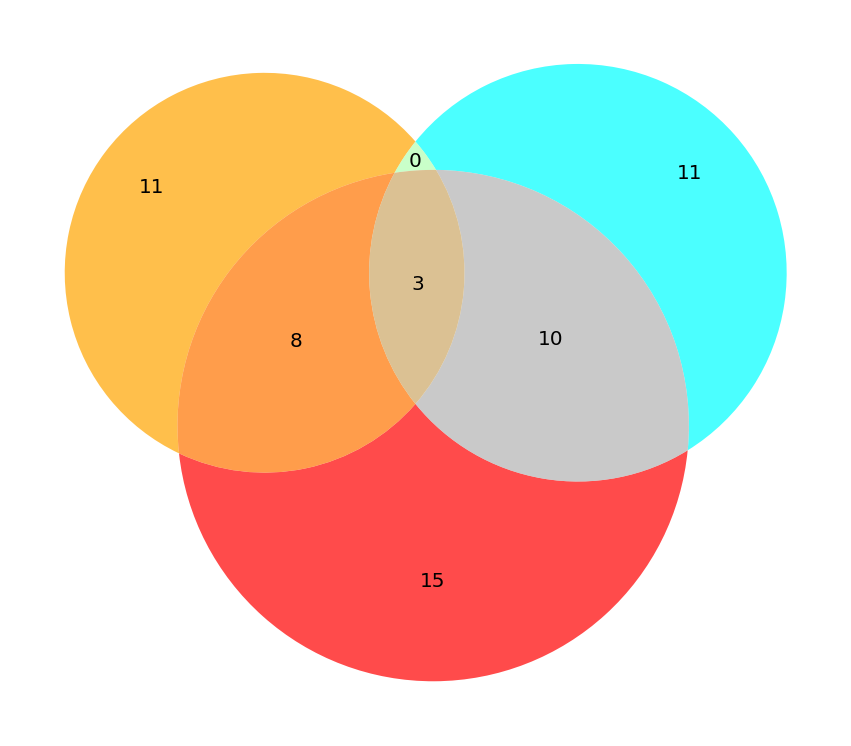

In [19]:
plt.figure(figsize=(15,15))
venn_num = venn3(subsets=(len(eigen_trim),len(louvain_trim),len(eigen_louv_inter),len(edge_trim),len(eigen_edge_inter),len(louv_edge_inter),len(all_inter)), 
      set_labels=('Eigen', 'Louvain', 'Edge Betw'), 
      set_colors=("orange", "cyan", "red"), alpha=0.7)

for text in venn_num.set_labels:
    text.set_fontsize(14)
    text.set_color("white")
for text in venn_num.subset_labels:
    text.set_fontsize(20)

plt.show

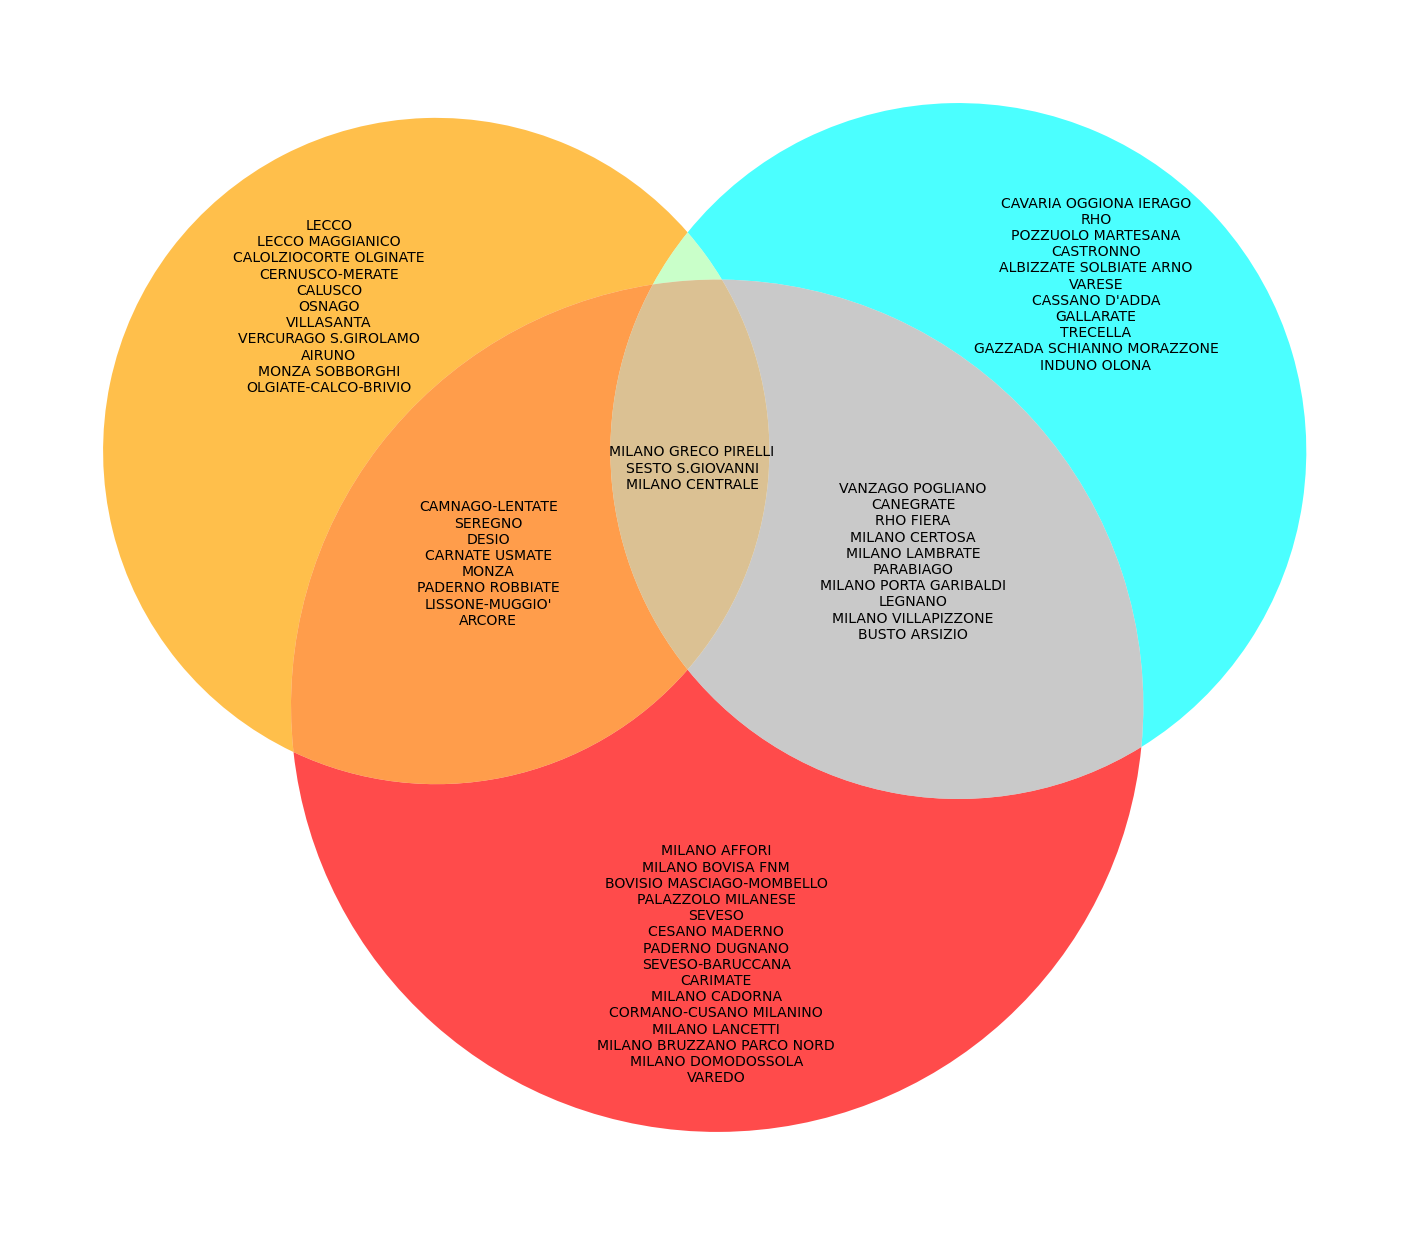

In [20]:
# import modules
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt

#sets
set1 = set(eigen_v)
set2 = set(louvain_v)
set3 = set(edge_betw_v)
#venn diagrams
plt.figure(figsize=(25,25))
venn = venn3(subsets=(set1, set2, set3), 
      set_labels=('Eigen', 'Louvain', 'Edge Betw'), 
      set_colors=("orange", "cyan", "red"), alpha=0.7)

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))

for text in venn.set_labels:
    text.set_fontsize(14)
    text.set_color("white")
for text in venn.subset_labels:
    text.set_fontsize(14)

venn.get_label_by_id("100").set_x(-0.4)
venn.get_label_by_id("010").set_x(0.4)

plt.show()